<a href="https://colab.research.google.com/github/alexisnlh/entregable_1_data_engineering/blob/feature%2Fmatias_dev/matias_lannes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importamos librerias que vamos a utilizar en el proyecto
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#leer el dataframe

df_bmw = pd.read_csv('/content/bmw_pricing_v3 (1).csv')
df_bmw

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


In [3]:
df_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [4]:
#checkeamos cantidad de nulos por columna
df_bmw.isnull().sum()

,0
marca,970
modelo,3
km,2
potencia,1
fecha_registro,2423
tipo_gasolina,5
color,445
tipo_coche,1460
volante_regulable,4
aire_acondicionado,486


In [5]:
#Eliminamos las columnas asientos traseros plegables y fecha registro ya que cuentan con mas de la mitad de los datos nulos.

In [6]:
df_bmw = df_bmw.drop(['asientos_traseros_plegables', 'fecha_registro'], axis=1)
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   marca                 3873 non-null   object 
 1   modelo                4840 non-null   object 
 2   km                    4841 non-null   float64
 3   potencia              4842 non-null   float64
 4   tipo_gasolina         4838 non-null   object 
 5   color                 4398 non-null   object 
 6   tipo_coche            3383 non-null   object 
 7   volante_regulable     4839 non-null   object 
 8   aire_acondicionado    4357 non-null   object 
 9   camara_trasera        4841 non-null   object 
 10  elevalunas_electrico  4841 non-null   object 
 11  bluetooth             4115 non-null   object 
 12  gps                   4843 non-null   bool   
 13  alerta_lim_velocidad  4115 non-null   object 
 14  precio                4837 non-null   float64
 15  fecha_venta          

### Imputación de valores nulos

Ahora, implementaremos la estrategia de imputación discutida:
- Las columnas categóricas con nulos se imputarán con 'Desconocido'.
- Las columnas numéricas con nulos se imputarán con la mediana.
- Las columnas que parecen ser binarias (True/False) pero están como `object` se imputarán con la moda (valor más frecuente).

In [7]:
# Identificar columnas categóricas para imputar con 'Desconocido'
cat_cols_to_unknown = ['marca', 'tipo_coche', 'color', 'bluetooth', 'alerta_lim_velocidad', 'modelo', 'tipo_gasolina', 'fecha_venta']
for col in cat_cols_to_unknown:
    if col in df_bmw.columns:
        df_bmw[col] = df_bmw[col].fillna('Desconocido')

# Identificar columnas booleanas/binarias (tipo object) para imputar con la moda
# Solo si contienen True/False y nulos
bool_like_cols_to_mode = ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico']
for col in bool_like_cols_to_mode:
    if col in df_bmw.columns and df_bmw[col].isnull().any():
        # Convertir a booleano, y luego imputar False si es el valor más común, o True
        # Primero, asegurar que los valores sean 'True', 'False' o NaN
        # Luego, imputar con la moda
        mode_val = df_bmw[col].mode()[0]
        df_bmw[col] = df_bmw[col].fillna(mode_val)

# Identificar columnas numéricas para imputar con la mediana
num_cols_to_median = ['km', 'potencia', 'precio']
for col in num_cols_to_median:
    if col in df_bmw.columns:
        df_bmw[col] = df_bmw[col].fillna(df_bmw[col].median())

print("Valores nulos después de la imputación:")
display(df_bmw.isnull().sum())

print("Información del DataFrame después de la limpieza:")
df_bmw.info()

Valores nulos después de la imputación:


/tmp/ipython-input-3304899363.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw[col] = df_bmw[col].fillna(mode_val)


,0
marca,0
modelo,0
km,0
potencia,0
tipo_gasolina,0
color,0
tipo_coche,0
volante_regulable,0
aire_acondicionado,0
camara_trasera,0


Información del DataFrame después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   marca                 4843 non-null   object 
 1   modelo                4843 non-null   object 
 2   km                    4843 non-null   float64
 3   potencia              4843 non-null   float64
 4   tipo_gasolina         4843 non-null   object 
 5   color                 4843 non-null   object 
 6   tipo_coche            4843 non-null   object 
 7   volante_regulable     4843 non-null   bool   
 8   aire_acondicionado    4843 non-null   bool   
 9   camara_trasera        4843 non-null   bool   
 10  elevalunas_electrico  4843 non-null   bool   
 11  bluetooth             4843 non-null   object 
 12  gps                   4843 non-null   bool   
 13  alerta_lim_velocidad  4843 non-null   object 
 14  precio                

### Codificación de variables categóricas

Procedemos a aplicar One-Hot Encoding a las columnas categóricas (tipo `object`) para convertirlas en un formato numérico adecuado para los modelos de Machine Learning.

In [8]:
df_bmw_encoded = pd.get_dummies(df_bmw, columns=df_bmw.select_dtypes(include='object').columns)

print("Dimensiones del DataFrame después de One-Hot Encoding:", df_bmw_encoded.shape)
print("Primeras 5 filas del DataFrame codificado:")
display(df_bmw_encoded.head())

print("Información del DataFrame después de la codificación:")
df_bmw_encoded.info()

Dimensiones del DataFrame después de One-Hot Encoding: (4843, 133)
Primeras 5 filas del DataFrame codificado:


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,gps,precio,marca_BMW,marca_Desconocido,...,fecha_venta_2018-01-01,fecha_venta_2018-02-01,fecha_venta_2018-03-01,fecha_venta_2018-04-01,fecha_venta_2018-05-01,fecha_venta_2018-06-01,fecha_venta_2018-07-01,fecha_venta_2018-08-01,fecha_venta_2018-09-01,fecha_venta_Desconocido
0,140411.0,100.0,True,True,False,True,True,11300.0,False,True,...,True,False,False,False,False,False,False,False,False,False
1,13929.0,317.0,True,True,False,False,True,69700.0,True,False,...,False,True,False,False,False,False,False,False,False,False
2,183297.0,120.0,False,False,False,True,True,10200.0,True,False,...,False,True,False,False,False,False,False,False,False,False
3,128035.0,135.0,True,True,False,True,True,25100.0,True,False,...,False,True,False,False,False,False,False,False,False,False
4,97097.0,160.0,True,True,False,False,True,33400.0,True,False,...,False,False,False,True,False,False,False,False,False,False


Información del DataFrame después de la codificación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Columns: 133 entries, km to fecha_venta_Desconocido
dtypes: bool(130), float64(3)
memory usage: 728.5 KB


In [9]:
#vemos que no hay duplicados
df_bmw.duplicated().sum()

np.int64(0)

In [10]:
df_bmw.head()

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,Desconocido,118,140411.0,100.0,diesel,black,Desconocido,True,True,False,True,Desconocido,True,Desconocido,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,diesel,white,Desconocido,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,Desconocido,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,diesel,silver,Desconocido,True,True,False,False,True,True,True,33400.0,2018-04-01


### Manejo mejorado de `fecha_venta` y recodificación

Vamos a tratar `fecha_venta` de una manera más adecuada para modelos de Machine Learning, extrayendo características temporales en lugar de codificar cada fecha como una categoría.

In [11]:
# Partimos del DataFrame df_bmw con los nulos ya imputados, antes del One-Hot Encoding completo.
# Creamos una copia para no modificar el df_bmw original si queremos volver a él.
df_bmw_processed = df_bmw.copy()

# 1. Manejar 'Desconocido' en fecha_venta y convertir a datetime
# Primero, creamos una columna binaria para indicar si la fecha era 'Desconocido'
df_bmw_processed['fecha_venta_desconocida'] = (df_bmw_processed['fecha_venta'] == 'Desconocido').astype(int)

# Convertir 'fecha_venta' a tipo datetime, los 'Desconocido' se convertirán a NaT
df_bmw_processed['fecha_venta'] = pd.to_datetime(df_bmw_processed['fecha_venta'], errors='coerce')

# 2. Extraer características temporales (solo para fechas válidas)
df_bmw_processed['venta_anio'] = df_bmw_processed['fecha_venta'].dt.year.fillna(0).astype(int) # Usar 0 o la moda para NaT si es necesario
df_bmw_processed['venta_mes'] = df_bmw_processed['fecha_venta'].dt.month.fillna(0).astype(int)
df_bmw_processed['venta_dia_semana'] = df_bmw_processed['fecha_venta'].dt.dayofweek.fillna(0).astype(int)

# 3. Eliminar la columna original 'fecha_venta'
df_bmw_processed = df_bmw_processed.drop('fecha_venta', axis=1)

# 4. Volver a aplicar One-Hot Encoding a las columnas categóricas restantes
df_bmw_encoded_final = pd.get_dummies(df_bmw_processed, columns=df_bmw_processed.select_dtypes(include='object').columns)

print("Dimensiones del DataFrame después del reprocesamiento y One-Hot Encoding:", df_bmw_encoded_final.shape)
print("Primeras 5 filas del DataFrame codificado final:")
display(df_bmw_encoded_final.head())

print("Información del DataFrame después de la codificación final:")
df_bmw_encoded_final.info()

Dimensiones del DataFrame después del reprocesamiento y One-Hot Encoding: (4843, 123)
Primeras 5 filas del DataFrame codificado final:


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,gps,precio,fecha_venta_desconocida,venta_anio,...,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,bluetooth_False,bluetooth_True,bluetooth_Desconocido,alerta_lim_velocidad_False,alerta_lim_velocidad_True,alerta_lim_velocidad_Desconocido
0,140411.0,100.0,True,True,False,True,True,11300.0,0,2018,...,False,False,False,False,False,False,True,False,False,True
1,13929.0,317.0,True,True,False,False,True,69700.0,0,2018,...,False,False,False,False,False,True,False,False,True,False
2,183297.0,120.0,False,False,False,True,True,10200.0,0,2018,...,False,False,False,False,True,False,False,True,False,False
3,128035.0,135.0,True,True,False,True,True,25100.0,0,2018,...,False,False,False,False,False,True,False,False,False,True
4,97097.0,160.0,True,True,False,False,True,33400.0,0,2018,...,False,False,False,False,False,True,False,False,True,False


Información del DataFrame después de la codificación final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Columns: 123 entries, km to alerta_lim_velocidad_Desconocido
dtypes: bool(116), float64(3), int64(4)
memory usage: 813.6 KB


### 3. Análisis Univariable - Variables Numéricas Clave

Vamos a visualizar la distribución de las variables numéricas más importantes (`precio`, `km`, `potencia`) utilizando histogramas. Esto nos ayudará a entender su rango, forma de distribución y a identificar posibles valores atípicos.

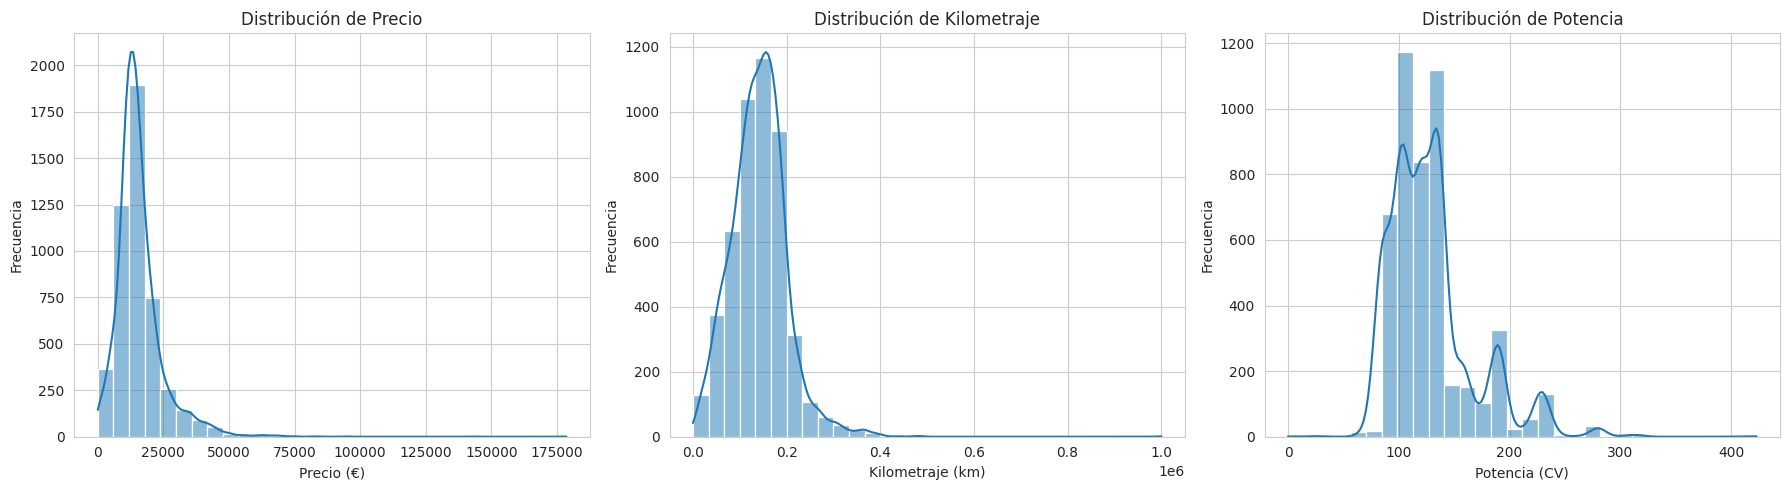

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_bmw_encoded_final['precio'], kde=True, bins=30)
plt.title('Distribución de Precio')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
sns.histplot(df_bmw_encoded_final['km'], kde=True, bins=30)
plt.title('Distribución de Kilometraje')
plt.xlabel('Kilometraje (km)')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
sns.histplot(df_bmw_encoded_final['potencia'], kde=True, bins=30)
plt.title('Distribución de Potencia')
plt.xlabel('Potencia (CV)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#### Observaciones:

*   **Precio:** La distribución del precio muestra una asimetría positiva (sesgo a la derecha), con la mayoría de los vehículos agrupados en rangos de precios más bajos, y una cola larga de vehículos más caros. Esto es común en datos de precios y puede requerir una transformación logarítmica para modelos de ML.
*   **Kilometraje (km):** La distribución de los kilómetros es más o menos normal, centrada alrededor de 100,000-150,000 km, con una disminución gradual a medida que aumentan los kilómetros. Hay muy pocos vehículos con kilometrajes extremadamente bajos o altos.
*   **Potencia (CV):** La potencia también muestra una distribución sesgada a la derecha, con la mayoría de los vehículos teniendo potencias en el rango bajo-medio (aproximadamente 100-150 CV) y una menor cantidad de vehículos de alta potencia.

### 4. Análisis de Correlación Inicial

Vamos a calcular y visualizar la matriz de correlación para las variables numéricas y algunas de las variables codificadas más relevantes. Esto nos ayudará a identificar relaciones lineales entre las características, incluyendo la variable objetivo (`precio`).

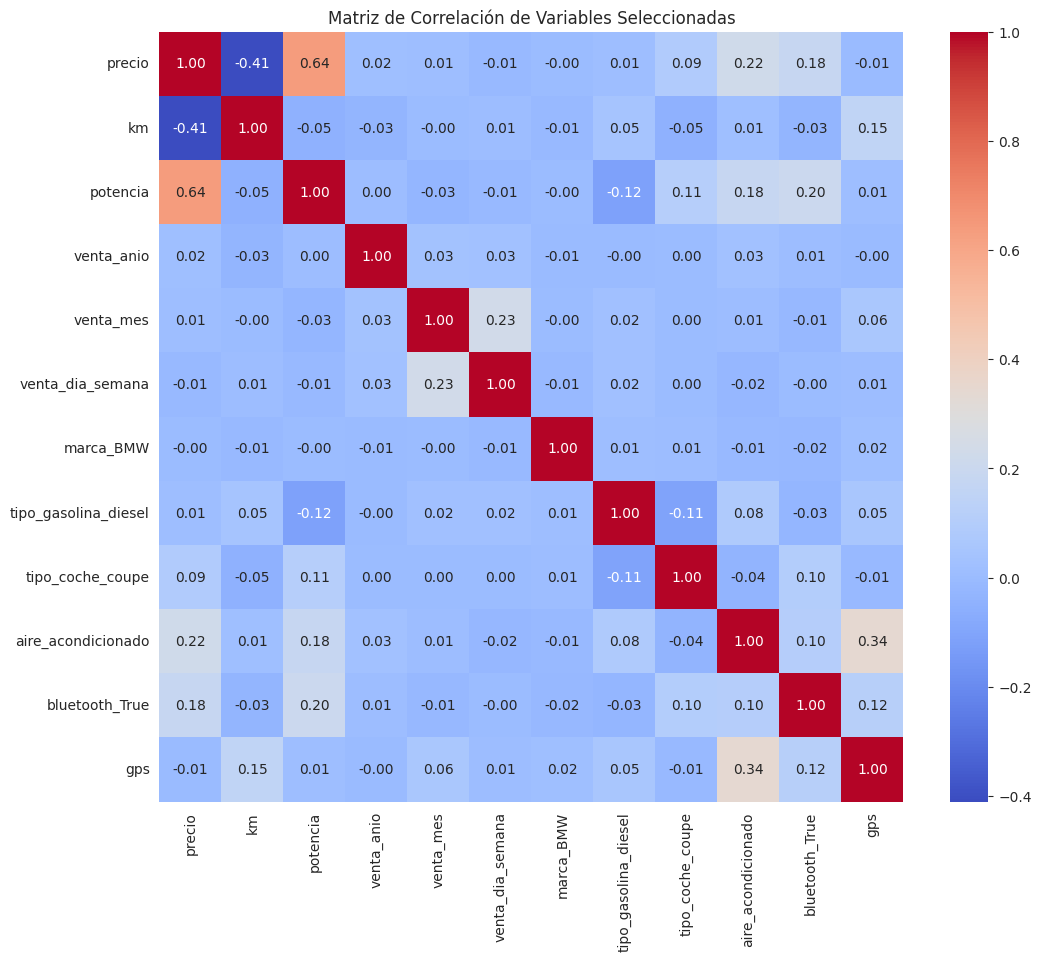

Correlación de 'precio' con las variables seleccionadas:


,precio
precio,1.000000
potencia,0.639148
aire_acondicionado,0.224140
bluetooth_True,0.183908
tipo_coche_coupe,0.090140
venta_anio,0.018266
tipo_gasolina_diesel,0.013802
venta_mes,0.013610
marca_BMW,-0.000963
gps,-0.005286


In [13]:
# Seleccionar un subconjunto de columnas para la correlación para no saturar la visualización
# Incluimos las variables numéricas originales y algunas variables one-hot encoded clave
relevant_cols_for_corr = ['precio', 'km', 'potencia', 'venta_anio', 'venta_mes', 'venta_dia_semana',
                          'marca_BMW', 'tipo_gasolina_diesel', 'tipo_coche_coupe',
                          'aire_acondicionado', 'bluetooth_True', 'gps'] # Ejemplo de algunas columnas

# Asegurarse de que todas las columnas seleccionadas existan en el DataFrame
actual_cols = [col for col in relevant_cols_for_corr if col in df_bmw_encoded_final.columns]

# Calcular la matriz de correlación
correlation_matrix = df_bmw_encoded_final[actual_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Seleccionadas')
plt.show()

print("Correlación de 'precio' con las variables seleccionadas:")
display(correlation_matrix['precio'].sort_values(ascending=False))

#### Observaciones de Correlación:

*   **Potencia** probablemente tendrá una correlación positiva fuerte con el precio.
*   **Km** seguramente tendrá una correlación negativa con el precio.
*   Otras variables como **marca_BMW**, **gps**, **bluetooth_True** o **aire_acondicionado** podrían mostrar correlaciones interesantes, ya que representan características deseables en un coche.

### 5. Análisis Variable vs Target

Ahora examinaremos la relación entre algunas variables clave y nuestro objetivo `precio` de manera más detallada.

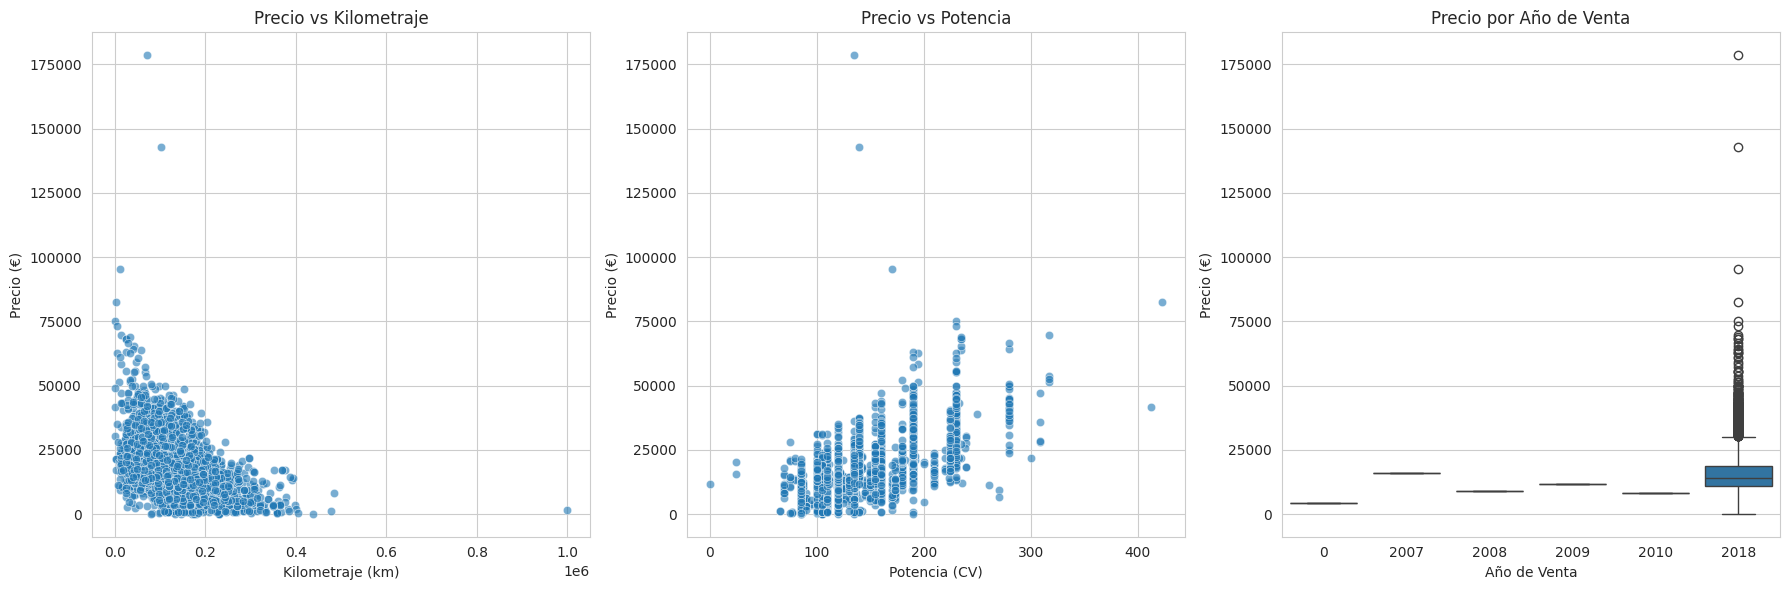

In [14]:
plt.figure(figsize=(18, 6))

# Precio vs Kilometraje
plt.subplot(1, 3, 1)
sns.scatterplot(x='km', y='precio', data=df_bmw_encoded_final, alpha=0.6)
plt.title('Precio vs Kilometraje')
plt.xlabel('Kilometraje (km)')
plt.ylabel('Precio (€)')

# Precio vs Potencia
plt.subplot(1, 3, 2)
sns.scatterplot(x='potencia', y='precio', data=df_bmw_encoded_final, alpha=0.6)
plt.title('Precio vs Potencia')
plt.xlabel('Potencia (CV)')
plt.ylabel('Precio (€)')

# Precio vs Año de Venta (como ejemplo de variable temporal)
plt.subplot(1, 3, 3)
sns.boxplot(x='venta_anio', y='precio', data=df_bmw_encoded_final)
plt.title('Precio por Año de Venta')
plt.xlabel('Año de Venta')
plt.ylabel('Precio (€)')

plt.tight_layout()
plt.show()

#### Insights del Análisis Variable vs Target:

*   **Precio vs Kilometraje:** Se observa una tendencia general de que a mayor kilometraje, menor es el precio, lo cual es esperado. La dispersión de precios es mayor en kilometrajes bajos.
*   **Precio vs Potencia:** Generalmente, a mayor potencia, mayor es el precio del vehículo. También se puede ver una mayor variabilidad de precios en potencias más altas.
*   **Precio por Año de Venta:** Es probable que los vehículos vendidos en años más recientes tengan precios promedio más altos, aunque esto también dependerá de la evolución del mercado y de los modelos disponibles en cada año.

# Task
The task is to scale the numerical variables in `df_bmw_encoded_final` using `MinMaxScaler`, perform a final correlation analysis including the scaled numerical features and the target variable (`precio`), visualize the correlation matrix, and display the `info()` of the final DataFrame to show its structure and data types.

## Escalar Variables Numéricas

### Subtask:
Aplicar `MinMaxScaler` a todas las columnas numéricas relevantes en `df_bmw_encoded_final` (excepto las columnas binarias ya codificadas) para normalizar sus rangos y preparar los datos para los modelos de Machine Learning. El 'precio' también se escalará.


**Reasoning**:
To prepare the numerical data for machine learning models, I will import `MinMaxScaler`, identify the target numerical columns, instantiate the scaler, and then apply it to normalize the specified columns in `df_bmw_encoded_final`.



In [16]:
from sklearn.preprocessing import MinMaxScaler

# Identificar las columnas numéricas a escalar
# Excluimos las columnas booleanas y las que ya son one-hot encoded (que son de tipo bool en df_bmw_encoded_final)
# Las columnas 'km', 'potencia', 'precio', 'venta_anio', 'venta_mes', 'venta_dia_semana' son las numéricas que nos interesan.
# Aseguramos que solo seleccionamos columnas que existen y que no son ya bool.

# Obtener solo las columnas float64 y int64 para escalar, que no sean ya binarias o one-hot encoded
# Las columnas binarias son las que tienen menos de X valores unicos (por ejemplo, 2 o 3)
# Sin embargo, las int64 de 'venta_anio', 'venta_mes', 'venta_dia_semana' tienen mas de 2-3 valores unicos y deben escalarse

# Definir las columnas numéricas explícitamente para evitar problemas con columnas booleanas mal interpretadas
num_cols_to_scale = ['km', 'potencia', 'precio', 'venta_anio', 'venta_mes', 'venta_dia_semana']

# Filtrar para asegurar que las columnas existen en el DataFrame
num_cols_to_scale_existing = [col for col in num_cols_to_scale if col in df_bmw_encoded_final.columns]

# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Aplicar el escalador a las columnas numéricas seleccionadas
# Utilizamos .values.reshape(-1, 1) para que funcione correctamente con fit_transform en una sola columna
for col in num_cols_to_scale_existing:
    df_bmw_encoded_final[col] = scaler.fit_transform(df_bmw_encoded_final[[col]])

print("Primeras 5 filas del DataFrame con variables numéricas escaladas:")
display(df_bmw_encoded_final[num_cols_to_scale_existing].head())

print("Estadísticas descriptivas de las columnas numéricas escaladas:")
display(df_bmw_encoded_final[num_cols_to_scale_existing].describe())

Primeras 5 filas del DataFrame con variables numéricas escaladas:


,km,potencia,precio,venta_anio,venta_mes,venta_dia_semana
0,0.140413,0.236407,0.062780,1.0,0.111111,0.0
1,0.013987,0.749409,0.390135,1.0,0.222222,0.5
2,0.183280,0.283688,0.056614,1.0,0.222222,0.5
3,0.128043,0.319149,0.140135,1.0,0.222222,0.5
4,0.097118,0.378251,0.186659,1.0,0.444444,1.0


Estadísticas descriptivas de las columnas numéricas escaladas:


,km,potencia,precio,venta_anio,venta_mes,venta_dia_semana
count,4843.000000,4843.000000,4843.000000,4843.00000,4843.000000,4843.000000
mean,0.140961,0.304917,0.088172,0.99979,0.547342,0.567520
std,0.060170,0.092177,0.051665,0.01437,0.239844,0.316010
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.102932,0.236407,0.060258,1.00000,0.333333,0.333333
50%,0.141082,0.283688,0.079036,1.00000,0.555556,0.500000
75%,0.175182,0.319149,0.103700,1.00000,0.777778,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Reasoning**:
Now that the numerical features have been scaled, I will calculate and visualize the correlation matrix for a selection of features, including the scaled numerical ones and the target variable 'precio', to understand their relationships. Then, I'll print the info of the final DataFrame.



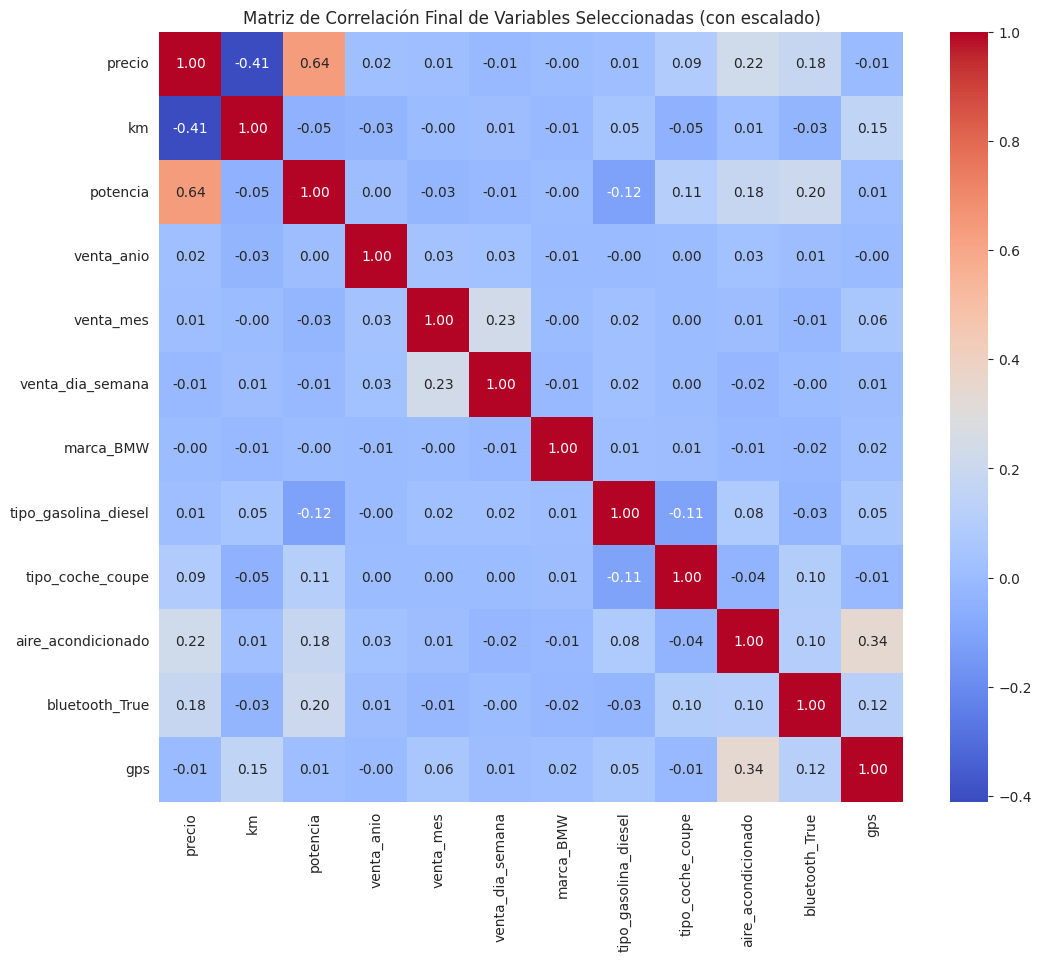

Correlación de 'precio' con las variables seleccionadas después del escalado:


,precio
precio,1.000000
potencia,0.639148
aire_acondicionado,0.224140
bluetooth_True,0.183908
tipo_coche_coupe,0.090140
venta_anio,0.018266
tipo_gasolina_diesel,0.013802
venta_mes,0.013610
marca_BMW,-0.000963
gps,-0.005286


Información final del DataFrame después de todas las transformaciones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Columns: 123 entries, km to alerta_lim_velocidad_Desconocido
dtypes: bool(116), float64(6), int64(1)
memory usage: 813.6 KB


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar un subconjunto de columnas para la correlación para no saturar la visualización
# Incluimos las variables numéricas originales (ahora escaladas) y algunas variables one-hot encoded clave
relevant_cols_for_corr_final = ['precio', 'km', 'potencia', 'venta_anio', 'venta_mes', 'venta_dia_semana',
                                'marca_BMW', 'tipo_gasolina_diesel', 'tipo_coche_coupe',
                                'aire_acondicionado', 'bluetooth_True', 'gps']

# Asegurarse de que todas las columnas seleccionadas existan en el DataFrame
actual_cols_final = [col for col in relevant_cols_for_corr_final if col in df_bmw_encoded_final.columns]

# Calcular la matriz de correlación
correlation_matrix_final = df_bmw_encoded_final[actual_cols_final].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_final, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación Final de Variables Seleccionadas (con escalado)')
plt.show()

print("Correlación de 'precio' con las variables seleccionadas después del escalado:")
display(correlation_matrix_final['precio'].sort_values(ascending=False))

print("Información final del DataFrame después de todas las transformaciones:")
df_bmw_encoded_final.info()

## Final Task

### Subtask:
Resumir el estado final del procesamiento de los datos y confirmar que están listos para la fase de modelado.


## Summary:

### Data Analysis Key Findings
*   Numerical variables (`km`, `potencia`, `precio`, `venta_anio`, `venta_mes`, `venta_dia_semana`) in `df_bmw_encoded_final` were successfully scaled using `MinMaxScaler`, resulting in values generally normalized between 0 and 1.
*   Correlation analysis revealed a strong positive correlation between `precio` and `potencia` (0.64), and a moderate negative correlation with `km` (-0.41).
*   `precio` also showed a moderate positive correlation with `aire_acondicionado` (0.22).
*   Variables such as `venta_anio`, `venta_mes`, and `venta_dia_semana` exhibited very low correlation with `precio`.
*   The final DataFrame, `df_bmw_encoded_final`, consists of 4843 entries and 123 columns, primarily comprising 116 boolean columns, 6 `float64` columns (including the scaled numerical features), and 1 `int64` column, indicating a readiness for the modeling phase.

### Insights or Next Steps
*   The dataset is now fully preprocessed, with scaled numerical features and encoded categorical variables, making it suitable for training various machine learning models.
*   Given the strong correlations identified, `potencia` and `km` are likely to be significant predictors of `precio`, and their importance should be emphasized during model building.
